# Wordle Analysis

The first thing to do is load the required libraries! I am using `pandas` for my datasets, `seaborn` for my plotting, `string` for its useful alphabet string and `matplotlib` for managing my `seaborn` plots.

In [1]:
%matplotlib inline
import string
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will now load the dataset `words.txt` from [this source](https://github.com/dwyl/english-words).
I then filter this dataset:
 - `len(word) == 5` only 5 letter words
 - `word.isalpha()` only words made of pure text (no hypens)
 - `word[0].upper() != word[0]` to remove any proper nouns
 
You may ask why I didn't choose to use the `words-alpha.txt`, the issue with this document is that it is all in lower case, so I have no idea which words are proper nouns!

In [2]:
with open("words.txt", "r", encoding="utf-8") as f:
    words = [
        word.upper()
        for word in f.read().splitlines()
        if len(word) == 5 and word.isalpha() and word[0].upper() != word[0]
    ]
    num_words = len(words)

# letter = (pd.DataFrame.from_records(letter_count[0]))

We will then create an empty DataFrame which will be used to count how often each letter falls in each position of a letter!
For example, the word "pilot", has one "P" in the column `count0`, one "I" in the column `count1`, one "L" in the column `count2` etc...

In [3]:
letter_count = pd.DataFrame(
    0, columns=[f"count{i}" for i in range(5)], index=list(string.ascii_uppercase)
)
print(letter_count)

   count0  count1  count2  count3  count4
A       0       0       0       0       0
B       0       0       0       0       0
C       0       0       0       0       0
D       0       0       0       0       0
E       0       0       0       0       0
F       0       0       0       0       0
G       0       0       0       0       0
H       0       0       0       0       0
I       0       0       0       0       0
J       0       0       0       0       0
K       0       0       0       0       0
L       0       0       0       0       0
M       0       0       0       0       0
N       0       0       0       0       0
O       0       0       0       0       0
P       0       0       0       0       0
Q       0       0       0       0       0
R       0       0       0       0       0
S       0       0       0       0       0
T       0       0       0       0       0
U       0       0       0       0       0
V       0       0       0       0       0
W       0       0       0       0 

For every word, do the same as we did for the word "pilot".

In [4]:
for word in words:
    for idx, letter in enumerate(word):
        letter_count.at[letter, f"count{idx}"] += 1

print(letter_count)

   count0  count1  count2  count3  count4
A     928    2183    1221    1217     808
B     868      94     353     236      85
C     946     223     441     406     172
D     669     110     403     404     761
E     335    1600     874    2141    1525
F     599      38     170     195      90
G     616      84     367     402     168
H     438     606     159     242     390
I     250    1336    1030    1038     338
J     193      15      40      26       2
K     366      89     257     425     293
L     516     710     803     761     589
M     618     194     510     388     245
N     326     499     935     715     619
O     289    1889    1016     742     399
P     790     249     376     374     199
Q      71      18      21       2       4
R     582     899    1196     702     711
S    1509     128     555     586    2813
T     829     271     644     836     953
U     294    1144     661     521     122
V     244      71     233     163      19
W     407     154     241     146 

Create a plot showing the frequency of each letter in the dataset (by position)

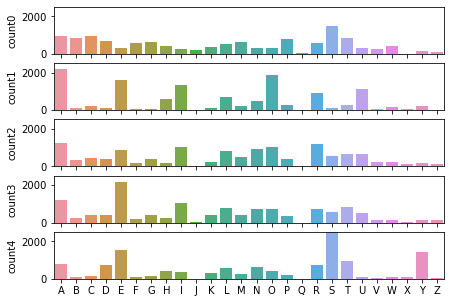

In [5]:
f, axs = plt.subplots(5, 1, figsize=(7, 5), sharex=True)
for ax in axs:
    ax.set(ylim=(0, 2500))
sns.barplot(x=letter_count.index, y=letter_count.count0, ax=axs[0])
sns.barplot(x=letter_count.index, y=letter_count.count1, ax=axs[1])
sns.barplot(x=letter_count.index, y=letter_count.count2, ax=axs[2])
sns.barplot(x=letter_count.index, y=letter_count.count3, ax=axs[3])
sns.barplot(x=letter_count.index, y=letter_count.count4, ax=axs[4])

plt.show()

This here creates a scoring system for every 5 letter word!
It's easiest to explaing this with an example!
Let's take the word "hello"

Let's refer to our previous table:
 - the letter "h" in the column `count0` scores: `438` (because it occurs 438 times in the dataset!
 - "e", `count1`: `1600`
 - "l", `count2`: `803`
 - "l", `count3`: `761`
 - "o", `count4`: `399`

So the total score of "hello" is: `4001`

In [6]:
word_scoring = pd.DataFrame(columns=["Word", "Score"])
for idx, word in enumerate(words):
    score = sum(
        [letter_count.at[letter, f"count{idx}"] for idx, letter in enumerate(word)]
    )
    x = pd.DataFrame({"Word": [word], "Score": [score]})
    word_scoring.loc[idx] = [word, score]


print(word_scoring.sort_values(by=["Score"], ascending=False).head())
# word_scoring.to_csv("scoring.csv", index=False)


        Word Score
9610   SANES  9581
10534  SORES  9548
9584   SALES  9449
9650   SATES  9290
10508  SONES  9287


The issue with this method, is that it gives high scores to words with repeated letters. Clearly, repeated letters do appear, but what if the letter had no "s", "SANES", "SORES", "SALES", "SATES", "SONES" all have these repeated letters (because that is the most common occurance).

So, what if we look at the total occurance of all the letters?

In [7]:
letter_count["sum"] = letter_count.sum(axis=1)
print(letter_count["sum"].to_dict())

{'A': 6357, 'B': 1636, 'C': 2188, 'D': 2347, 'E': 6475, 'F': 1092, 'G': 1637, 'H': 1835, 'I': 3992, 'J': 276, 'K': 1430, 'L': 3379, 'M': 1955, 'N': 3094, 'O': 4335, 'P': 1988, 'Q': 116, 'R': 4090, 'S': 5591, 'T': 3533, 'U': 2742, 'V': 730, 'W': 1041, 'X': 301, 'Y': 2079, 'Z': 396}


And then take the top 5 most common letters:

In [8]:
highest_frequency = sorted(letter_count["sum"].to_dict().items(), key=lambda item: item[1])[-5:]
high_freq_l = ([group[0] for group in highest_frequency])

And then we can see which words conform to only these unique 5 letters:

In [9]:
[word for word in word_scoring["Word"] if sorted(list(word)) == sorted(high_freq_l)]

['AROSE', 'SEORA']

There are some issues with this:
 - Not all the words in the dataset are allowed on wordle! For example, "SEORA" is not acceptable! This will cause skewness in our analysis!
 - It's still not a perfect solution, but what if we were to combine our knowledge from the "per position" scoring and the "per letter" scoring, and anaylse it that way?

In [10]:
# word_scoring.rename({"Score": "CountScore", "Word": "Word"})
word_scoring["LetterScore"] = np.nan
word_scoring

,Word,Score,LetterScore
0,AAHED,6172,NaN
1,AALII,5290,NaN
2,AARGH,5099,NaN
3,ABACA,3457,NaN
4,ABACI,2987,NaN
...,...,...,...
12922,ZORRO,4279,NaN
12923,ZOWIE,4786,NaN
12924,ZUCCO,2483,NaN
12925,ZUDDA,2852,NaN


In [11]:
for idx, word in enumerate(words):
    score = sum(
        [letter_count["sum"].to_dict()[letter] for letter in word]
    )
    word_scoring.at[idx, "LetterScore"] = score
word_scoring

,Word,Score,LetterScore
0,AAHED,6172,23371.0
1,AALII,5290,24077.0
2,AARGH,5099,20276.0
3,ABACA,3457,22895.0
4,ABACI,2987,20530.0
...,...,...,...
12922,ZORRO,4279,17246.0
12923,ZOWIE,4786,16239.0
12924,ZUCCO,2483,11849.0
12925,ZUDDA,2852,14189.0


In [12]:
word_scoring["Total Score"] = word_scoring["Score"] + word_scoring["LetterScore"]
word_scoring.sort_values(by=["Total Score"], ascending=False).head(20)

,Word,Score,LetterScore,Total Score
3421,EASES,8027,30489.0,38516.0
9584,SALES,9449,27393.0,36842.0
9650,SATES,9290,27547.0,36837.0
9610,SANES,9581,27108.0,36689.0
9039,RASES,8274,28104.0,36378.0
7808,OASES,7981,28349.0,36330.0
757,ASSES,6565,29605.0,36170.0
9644,SASSE,6358,29605.0,35963.0
9818,SEERS,7498,28222.0,35720.0
3663,ESSES,5972,29723.0,35695.0


The problem we see here is that "AROSE" doesn't even appear on this list!

This is probably because my statistical analysis is not good enough! The problem is that "S" is disproportionately outwaying the other letters because a lot of these words are 4 letter plurals (so 5 with an "S" at the end)

I hope this information could help someone do their own analysis of this dataset, it would be interesting to see what the best word is! Perhaps making a simulation of the game would give different results?

### Scrabbling Scoring

In [13]:
# https://gist.github.com/jimbob88/15b2e7d7a2dd20698c9720b472fdc505
scrabble_score = {
  "A": 1,
  "B": 3,
  "C": 3,
  "D": 2,
  "E": 1,
  "F": 4,
  "G": 2,
  "H": 4,
  "I": 1,
  "J": 8,
  "K": 5,
  "L": 1,
  "M": 3,
  "N": 1,
  "O": 1,
  "P": 3,
  "Q": 10,
  "R": 1,
  "S": 1,
  "T": 1,
  "U": 1,
  "V": 4,
  "W": 4,
  "X": 8,
  "Y": 4,
  "Z": 10
}
for idx, word in enumerate(words):
    score = sum(
        [scrabble_score[letter] for letter in word]
    )
    word_scoring.at[idx, "ScrabbleScore"] = score

In [14]:
word_scoring.sort_values(by=["ScrabbleScore"], ascending=True).head(20)

,Word,Score,LetterScore,Total Score,ScrabbleScore
10781,STERE,4881,26164.0,31045.0,5.0
10778,STENO,3768,23028.0,26796.0,5.0
10773,STELL,4004,22357.0,26361.0,5.0
10772,STELE,4940,25453.0,30393.0,5.0
10771,STELA,4223,25335.0,29558.0,5.0
10768,STEER,5506,26164.0,31670.0,5.0
10763,STEAN,4490,25050.0,29540.0,5.0
10761,STEAL,4460,25335.0,29795.0,5.0
12150,UTERO,2540,21175.0,23715.0,5.0
10755,STAUN,4141,21317.0,25458.0,5.0
